In [5]:
using Images
using Flux

#(MNIST png) 
#https://www.kaggle.com/datasets/jidhumohan/mnist-png/

In [19]:
using Plots


In [39]:
using Flux:crossentropy, onecold,onehotbatch, params, train!

In [2]:
#Extracción de datos 

function Data(path) 
    X = [] # X == Matriz de imágenes descompuesta en la intensidad de color (RGB)
    y = [] # y == Matriz asociada al número de cada imágen 
    for label in readdir(path) #readdir == read directory 
        for file in readdir("$path/$label") 
            img = load("$path/$label/$file") #load == Descarga cada una de las imágenes 
            data = reshape(Float32.(channelview(img)),28,28,1) #Ajusta el tamaño de la imagen (channelview == Intensidad de color (RGB))
            if length(X) == 0
                X = data  
            else
                X = cat(X,data,dims=3) #cat == concatenar matrices 
            end
            push!(y,parse(Float32,label)) #push! ==rellena la matriz sin matriz de ceros  #parse == string a float32
        end
    end
    return X,y
end

createDataset (generic function with 1 method)

In [4]:
x_train, y_train = Data("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\archive\\mnist_png\\mnist_png\\testing")
#x_train == Matriz de entrenamiento de imágenes descompuesta en la intensidad de color (RGB)
#y_train == y == Matriz asociada de entrenamiento al número de cada imágen 

x_test, y_test = Data("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\archive\\mnist_png\\mnist_png\\training")
#x_test == Matriz de prueba de imágenes descompuesta en la intensidad de color (RGB)
#y_test == y == Matriz asociada de prueba al número de cada imágen 

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0  …  2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0, 2.0f0])

In [33]:
#Definir el modelo

model = Chain(Flux.flatten,Dense(784,32,relu),Dense(32,10),softmax)

#Chain == Crea redes neuronales, recibe las capas y neuronas en cada una
#Flatten == "Aplana la matriz 28*28 de los datos extraidos de las imágenes
#W and b == random values 
# 784 == capas de entrada 10 == capas de salida 
# Función sigmoide == σ

Chain(
  Flux.flatten,
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [154]:
# Unificación de los datos de entrenamiento 

data= Flux.DataLoader((x_train,y_train), shuffle=true)

# Initializa el optimizador ADAM #Adaptive Moment Estimation (ADAM)

learning_rate=.01

#optimizer= ADAM(learning_rate)
optimizer = Flux.setup(Adam(learning_rate), model)

#Define la función de pérdida que utiliza crossentropy para
# medir el error comparando las predicciones de datos del modelo

#loss(x,y)=crossentropy(model(x),y)

function loss(model, x, y)
	return Flux.crossentropy(model(x),Flux.onehotbatch(y,0:9)) 
end

#=ps=params(model)
epochs=500
loss_history=[]

for epoch in 1:epochs
	train!(loss,ps,[(x_train,y_train)],opt)
	train_loss=loss(x_train,y_train)
	push!(loss_history,train_loss)
	println("Epoch = $epoch : Training Loss = $train_loss")
end=#

# Se entrena el modelo 300 veces  
for epoch in 1:300
	Flux.train!(loss, model, data, optimizer) 
end

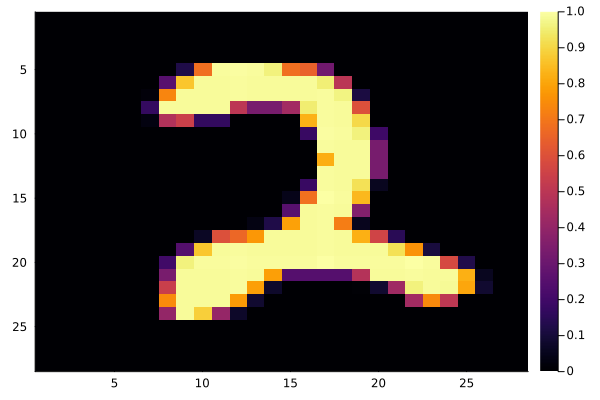

In [132]:
#Datos de entrenamiento 

#La imagen de entrenamiento n corresponde al número m (0<=m<=9)
n=3000
heatmap(x_train[:,:,n],yflip=true)

In [133]:
predict = model(Flux.unsqueeze(x_train[:,:,n],dims=3)) 
guess_n= sum(predict.*collect(0:9)) #Despliega el valor estimado por la red

2.0f0

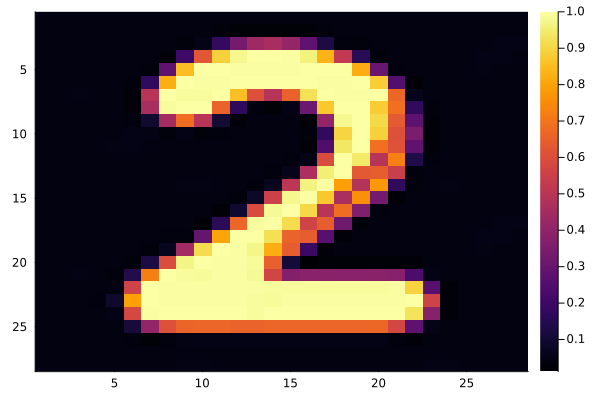

In [152]:
#Datos de prueba

#Número 2

nn=collect(0:9)

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_2.png")
img6 = (x-> Gray(1)-x.val).(img)
prueba_1= reshape(Float32.(channelview(img6)),28,28)

heatmap(prueba_1,yflip=true)

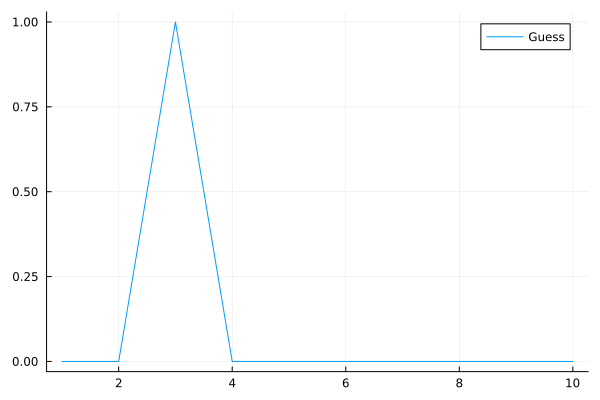

In [153]:
predict = model(Flux.unsqueeze(prueba_1,dims=3)) 

plot(nn,predict,label="Guess") #Despliega el valor estimado por la red

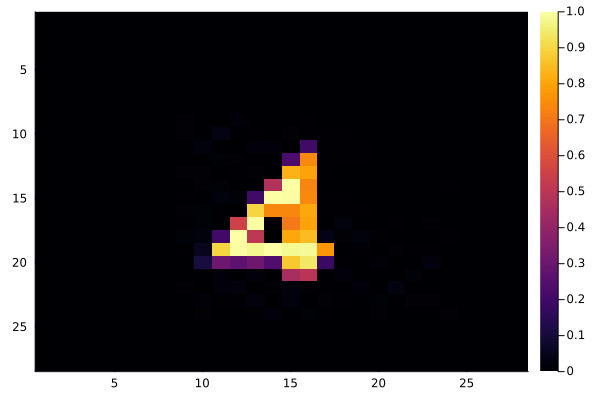

In [136]:
#Número 4

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_4.png")
#img6 = (x-> Gray(1)-x.val).(img)
prueba_2= reshape(Float32.(channelview(img)),28,28)

heatmap(prueba_2,yflip=true)

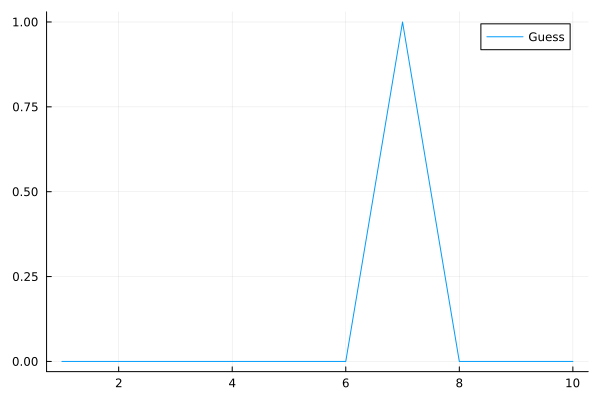

In [137]:
predict = model(Flux.unsqueeze(prueba_2,dims=3)) 

plot(nn,predict,label="Guess")

┌ Warning: Png warn: iCCP: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG
└ @ PNGFiles C:\Users\sanjo\.julia\packages\PNGFiles\pLKS8\src\wraphelpers.jl:2


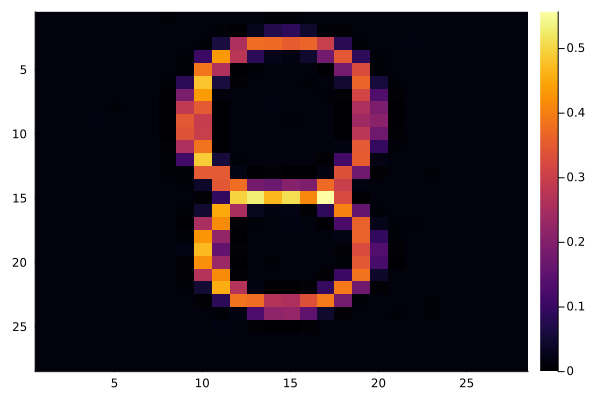

In [138]:
#Número 8

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_8.png")
img6 = (x-> Gray(1)-x.val).(img)
prueba_3= reshape(Float32.(channelview(img6)),28,28,1)

heatmap(nn, prueba_3[:,:,1],yflip=true)

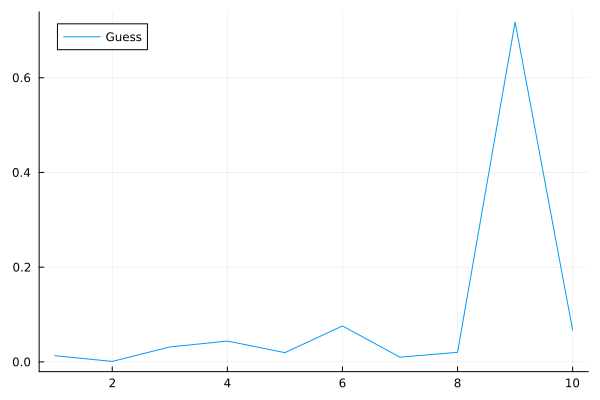

In [139]:
predict = model(Flux.unsqueeze(prueba_3,dims=3)) 

#guess_n= sum(predict.*collect(0:9)) #Despliega el valor estimado por la red

plot(nn,predict,label="Guess")

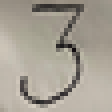

In [140]:
#Número 3 ( Múltiples capas )

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_5.png")

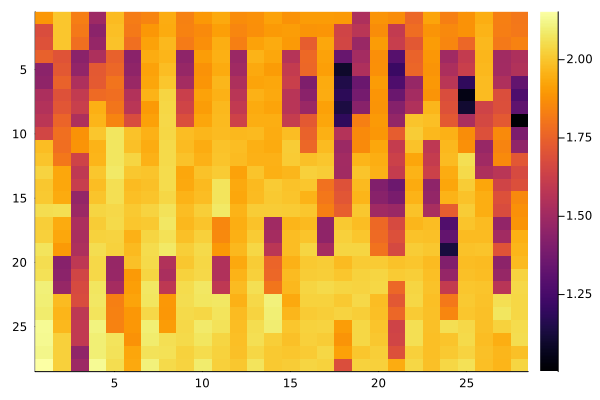

In [144]:
prueba_5= reshape(Float32.(channelview(img)),28,28,3)

prueba_5=sum(prueba_5,dims=3)

heatmap(prueba_5[:,:],yflip=true)

┌ Warning: Png warn: iCCP: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG
└ @ PNGFiles C:\Users\sanjo\.julia\packages\PNGFiles\pLKS8\src\wraphelpers.jl:2


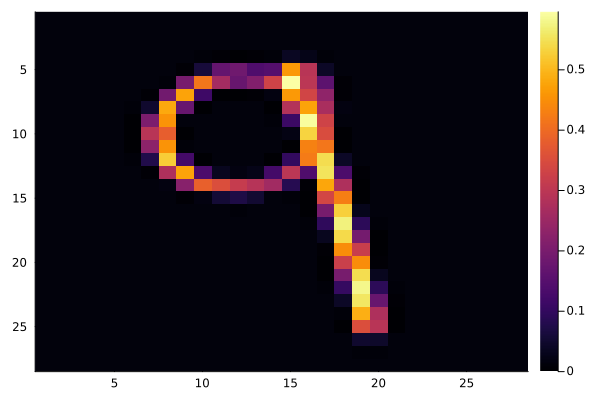

In [145]:
#Número 9

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_9 (2).png")
img6 = (x-> Gray(1)-x.val).(img)
prueba_9= reshape(Float32.(channelview(img6)),28,28,1)

heatmap(prueba_9[:,:,1],yflip=true)

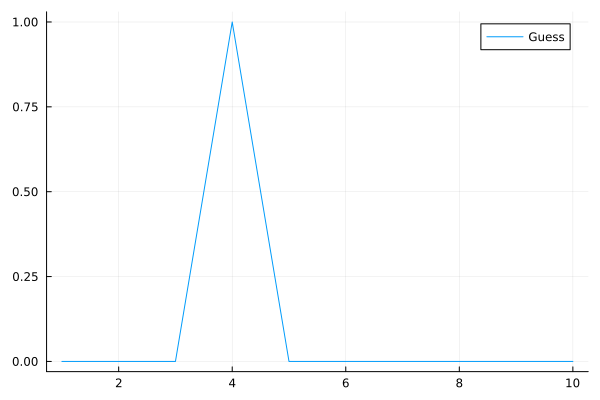

In [146]:
predict = model(Flux.unsqueeze(prueba_9,dims=3)) 

#guess_n= sum(predict.*collect(0:9)) #Despliega el valor estimado por la red

plot(nn,predict,label="Guess")

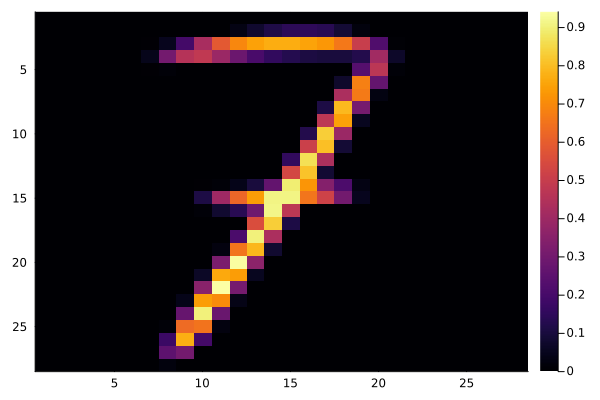

In [150]:
#Número 7

img =load("C:\\Users\\sanjo\\OneDrive\\Documentos\\5_Semestre\\Estocasticos\\prueba_7.png")
#img6 = (x-> Gray(1)-x.val).(img)
prueba_7= reshape(Float32.(channelview(img)),28,28,1)

heatmap(prueba_7[:,:],yflip=true)

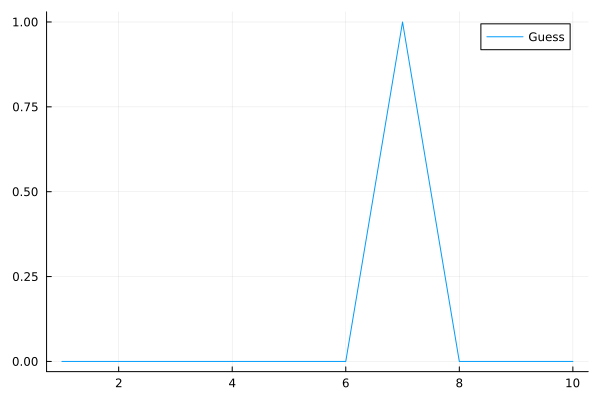

In [151]:
predict = model(Flux.unsqueeze(prueba_7,dims=3)) 

#guess_n= sum(predict.*collect(0:9)) #Despliega el valor estimado por la red

plot(nn,predict,label="Guess")